<a href="https://colab.research.google.com/github/Edu-Moreira/Estudos-de-Python/blob/main/Compara%C3%A7%C3%A3o_ETFs%20v1.04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [315]:
! pip install investpy 

In [316]:
import investpy as inv
import pandas as pd 
import seaborn as sns 
import time
import matplotlib.pyplot as plt 
import datetime as dt

In [317]:
hoje = dt.date.today()
hoje = hoje.strftime('%d/%m/%Y')
print(hoje)

pais = 'united states'

tipo_etf = 'bond'

19/04/2022


In [318]:
# obtendo a lista de todos os ETFs dos Estados Unidos no Investing.com

lista_etf = inv.get_etfs_dict(pais)


In [319]:
# Para buscar informações especificas de cada ETF 
'''
for i in range(len(lista_etf)):
    if (lista_etf[i]['isin']=='US46434V6130'):
        info = lista_etf[i]['name']
'''

#Obetndo lista com o nome de todos os ETFs
nome_etf = []

#Cria um filtro por tipo de etf
for i in range(len(lista_etf)):
  if (lista_etf[i]['asset_class']== tipo_etf):
    nome_etf.append(lista_etf[i]['name'])  


# #para fazer a busca sem filtro
# for i in range(len(lista_etf)):
#   nome_etf.append(lista_etf[i]['name'])


In [320]:
# nome_etf_filtro  = []
# filtro = [s for s in nome_etf if "High Yield" in s]

# for i in range(len(nome_etf)):
#   if(nome_etf[i] == any(filtro)):
#     nome_etf.drop(nome_etf[i])

In [321]:
# painel = pd.DataFrame()

# painel['IGOV'] = inv.get_etf_historical_data(etf = 'iShares International Treasury Bond',country = pais, from_date = '01/01/2015',to_date = hoje)['Close']

# painel['BWX'] = inv.get_etf_historical_data(etf = 'SPDR Barclays International Treasury Bond',country = pais, from_date = '01/01/2015',to_date = hoje)['Close']

In [322]:
etf1 =pd.DataFrame()
painel = pd.DataFrame()

for i  in range(len(nome_etf)):
  try:
    etf1= inv.get_etf_historical_data(etf = nome_etf[i], country = pais, from_date = '01/01/2015', to_date = hoje)['Close']
    etf1 = pd.DataFrame(etf1)
    etf1.columns = [nome_etf[i]]
    painel = pd.concat([painel,etf1[nome_etf[i]]],axis =1)
    time.sleep(2)
  except:
    pass
      

/usr/local/lib/python3.7/dist-packages/investpy/etfs.py:745: Warning: Selected country does not contain the default stock exchange of the introduced ETF. Default country is: "united kingdom" and default stock_exchange: "London".
  Warning,
/usr/local/lib/python3.7/dist-packages/investpy/etfs.py:745: Warning: Selected country does not contain the default stock exchange of the introduced ETF. Default country is: "germany" and default stock_exchange: "Xetra".
  Warning,
/usr/local/lib/python3.7/dist-packages/investpy/etfs.py:745: Warning: Selected country does not contain the default stock exchange of the introduced ETF. Default country is: "mexico" and default stock_exchange: "Mexico".
  Warning,
/usr/local/lib/python3.7/dist-packages/investpy/etfs.py:745: Warning: Selected country does not contain the default stock exchange of the introduced ETF. Default country is: "germany" and default stock_exchange: "Munich".
  Warning,


In [323]:
painel = painel.set_index(pd.to_datetime(painel.index))


In [324]:
painel.head()


,Peritus High Yield,Newfleet Multi-Sector Income,AdvisorShares Sage Core Reserves,Madrona Global Bond,Anfield Universal Fixed Income,ALPS RiverFront Strategic Income,American Century Diversified Corporate Bond,Arrow Dow Jones Global Yield,iShares iBonds Dec 2025 Term Muni Bond,iShares Inflation Hedged Corporate Bond,...,WisdomTree Barclays Interest Rate Hedge US Aggrega,WisdomTree Emerging Markets Local Debt,WisdomTree Negative Duration High Yield Bond,WisdomTree Fundamental U.S. High Yield Corporate B,WisdomTree Barclays Negative Duration US Aggregate,WisdomTree Yield Enhanced Global Aggregate Bond,WisdomTree Emerging Markets Corporate Bond,Xtrackers Low Beta High Yield Bond,Xtrackers High Beta High Yield Bond,Xtrackers Short Duration High Yield
2015-01-02,41.34,49.12,NaN,25.53,NaN,24.90,NaN,24.08,NaN,NaN,...,49.29,41.34,21.32,NaN,NaN,NaN,71.39,NaN,NaN,NaN
2015-01-05,40.86,49.14,NaN,25.64,NaN,24.87,NaN,23.86,NaN,NaN,...,49.27,40.92,21.12,NaN,44.78,NaN,70.99,NaN,NaN,NaN
2015-01-06,40.20,49.16,NaN,25.53,NaN,24.70,NaN,23.71,NaN,NaN,...,49.02,40.90,21.12,NaN,44.33,NaN,70.23,NaN,NaN,NaN
2015-01-07,40.38,49.18,NaN,25.66,NaN,24.83,NaN,23.93,NaN,NaN,...,49.10,41.24,NaN,NaN,44.49,NaN,70.78,NaN,NaN,NaN
2015-01-08,40.63,49.27,NaN,25.69,NaN,24.87,NaN,24.30,NaN,NaN,...,49.18,41.46,21.39,NaN,44.94,NaN,71.33,NaN,NaN,NaN


In [325]:
import io
import requests

url= 'https://github.com/Edu-Moreira/Estudos-de-Python/raw/main/Dados/Dados%20IE.xlsx'
myfile = requests.get(url)

df=pd.read_excel(myfile.content)
print(df)

           Data  USD LC07TRUU   USD SPTR   USD M1CXBRU   USD MIMUEMRN   \
0    1998-12-31       212.0865   1670.006        477.68      267.04001   
1    1999-01-04       212.0641   1668.521        486.52      270.20279   
2    1999-01-05       211.8054   1691.253        489.26      272.39230   
3    1999-01-06       212.1331   1729.083        496.11      278.48300   
4    1999-01-07       211.7084   1725.640        494.54      279.80511   
...         ...            ...        ...           ...            ...   
5790 2022-01-18       616.7014   9595.926       1588.46     1758.11600   
5791 2022-01-19       618.1821   9503.135       1580.24     1755.67800   
5792 2022-01-20       618.8629   9398.964       1590.57     1776.91891   
5793 2022-01-21       620.5297   9221.282       1564.14     1759.46330   
5794 2022-01-24       619.7807   9246.837       1521.55     1727.05400   

      USD LG38TRUU  USD SPTRSMCP   
0         244.2719        186.094  
1         244.2719        186.094  
2  

In [326]:
df.rename(columns= {'Data': 'Date'}, inplace = True)
df_benchmark  = df[['Date','USD LG38TRUU']]
df_benchmark = df_benchmark.set_index('Date')
df_benchmark = df_benchmark['20150102':]
df_benchmark

,USD LG38TRUU
Date,
2015-01-02,444.7735
2015-01-05,443.2462
2015-01-06,445.2654
2015-01-07,441.3983
2015-01-08,441.2247
...,...
2022-01-18,491.6966
2022-01-19,491.8776
2022-01-20,493.2359


In [327]:
painel1 = painel.loc['20150102':'20220121']
painel1

,Peritus High Yield,Newfleet Multi-Sector Income,AdvisorShares Sage Core Reserves,Madrona Global Bond,Anfield Universal Fixed Income,ALPS RiverFront Strategic Income,American Century Diversified Corporate Bond,Arrow Dow Jones Global Yield,iShares iBonds Dec 2025 Term Muni Bond,iShares Inflation Hedged Corporate Bond,...,WisdomTree Barclays Interest Rate Hedge US Aggrega,WisdomTree Emerging Markets Local Debt,WisdomTree Negative Duration High Yield Bond,WisdomTree Fundamental U.S. High Yield Corporate B,WisdomTree Barclays Negative Duration US Aggregate,WisdomTree Yield Enhanced Global Aggregate Bond,WisdomTree Emerging Markets Corporate Bond,Xtrackers Low Beta High Yield Bond,Xtrackers High Beta High Yield Bond,Xtrackers Short Duration High Yield
2015-01-02,41.34,49.12,NaN,25.53,NaN,24.90,NaN,24.08,NaN,NaN,...,49.29,41.34,21.32,NaN,NaN,NaN,71.39,NaN,NaN,NaN
2015-01-05,40.86,49.14,NaN,25.64,NaN,24.87,NaN,23.86,NaN,NaN,...,49.27,40.92,21.12,NaN,44.78,NaN,70.99,NaN,NaN,NaN
2015-01-06,40.20,49.16,NaN,25.53,NaN,24.70,NaN,23.71,NaN,NaN,...,49.02,40.90,21.12,NaN,44.33,NaN,70.23,NaN,NaN,NaN
2015-01-07,40.38,49.18,NaN,25.66,NaN,24.83,NaN,23.93,NaN,NaN,...,49.10,41.24,NaN,NaN,44.49,NaN,70.78,NaN,NaN,NaN
2015-01-08,40.63,49.27,NaN,25.69,NaN,24.87,NaN,24.30,NaN,NaN,...,49.18,41.46,21.39,NaN,44.94,NaN,71.33,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-14,30.88,48.21,98.38,NaN,9.465,24.47,51.24,15.11,27.68,29.50,...,46.69,29.91,NaN,51.98,NaN,NaN,72.72,50.09,47.22,47.24
2022-01-18,30.74,48.10,98.39,NaN,9.450,24.47,50.98,14.99,27.59,29.24,...,46.60,29.69,NaN,51.63,NaN,NaN,72.31,49.87,46.90,47.11
2022-01-19,30.81,48.12,98.32,NaN,9.520,24.42,51.01,15.00,27.63,29.24,...,46.57,29.97,NaN,51.62,NaN,NaN,72.47,49.86,46.89,47.10
2022-01-20,31.00,48.12,98.32,NaN,9.500,24.32,50.97,14.93,27.60,29.22,...,46.55,30.00,NaN,51.43,NaN,NaN,72.58,49.75,46.75,47.00


In [328]:
tot_df = pd.concat([df_benchmark,painel1], axis=1)
tot_df['iShares International Treasury Bond']

,USD LG38TRUU,Peritus High Yield,Newfleet Multi-Sector Income,AdvisorShares Sage Core Reserves,Madrona Global Bond,Anfield Universal Fixed Income,ALPS RiverFront Strategic Income,American Century Diversified Corporate Bond,Arrow Dow Jones Global Yield,iShares iBonds Dec 2025 Term Muni Bond,...,WisdomTree Barclays Interest Rate Hedge US Aggrega,WisdomTree Emerging Markets Local Debt,WisdomTree Negative Duration High Yield Bond,WisdomTree Fundamental U.S. High Yield Corporate B,WisdomTree Barclays Negative Duration US Aggregate,WisdomTree Yield Enhanced Global Aggregate Bond,WisdomTree Emerging Markets Corporate Bond,Xtrackers Low Beta High Yield Bond,Xtrackers High Beta High Yield Bond,Xtrackers Short Duration High Yield
2015-01-02,444.7735,41.34,49.12,NaN,25.53,NaN,24.90,NaN,24.08,NaN,...,49.29,41.34,21.32,NaN,NaN,NaN,71.39,NaN,NaN,NaN
2015-01-05,443.2462,40.86,49.14,NaN,25.64,NaN,24.87,NaN,23.86,NaN,...,49.27,40.92,21.12,NaN,44.78,NaN,70.99,NaN,NaN,NaN
2015-01-06,445.2654,40.20,49.16,NaN,25.53,NaN,24.70,NaN,23.71,NaN,...,49.02,40.90,21.12,NaN,44.33,NaN,70.23,NaN,NaN,NaN
2015-01-07,441.3983,40.38,49.18,NaN,25.66,NaN,24.83,NaN,23.93,NaN,...,49.10,41.24,NaN,NaN,44.49,NaN,70.78,NaN,NaN,NaN
2015-01-08,441.2247,40.63,49.27,NaN,25.69,NaN,24.87,NaN,24.30,NaN,...,49.18,41.46,21.39,NaN,44.94,NaN,71.33,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-18,491.6966,30.74,48.10,98.39,NaN,9.45,24.47,50.98,14.99,27.59,...,46.60,29.69,NaN,51.63,NaN,NaN,72.31,49.87,46.90,47.11
2022-01-19,491.8776,30.81,48.12,98.32,NaN,9.52,24.42,51.01,15.00,27.63,...,46.57,29.97,NaN,51.62,NaN,NaN,72.47,49.86,46.89,47.10
2022-01-20,493.2359,31.00,48.12,98.32,NaN,9.50,24.32,50.97,14.93,27.60,...,46.55,30.00,NaN,51.43,NaN,NaN,72.58,49.75,46.75,47.00
2022-01-21,493.8587,30.82,48.19,98.36,NaN,9.51,24.34,51.10,14.81,27.53,...,46.51,30.03,NaN,51.46,NaN,NaN,72.57,49.73,46.70,46.99


In [369]:
corr_etfs = tot_df.pct_change()
corr_etfs = corr_etfs.corr()
gla_etfs = corr_etfs['USD LG38TRUU']

etfs_eleitos = gla_etfs.sort_values(ascending = False)

In [396]:
etfs_eleitos.head(10)

USD LG38TRUU                                          1.000000
SPDR Barclays International Treasury Bond             0.701514
iShares 1-3 Year International Treasury Bond          0.673653
SPDR Barclays Short Term Intl Treasury Bond           0.632167
SPDR Barclays International Corporate Bond            0.628752
PowerShares International Corporate Bond              0.557354
SPDR Citi International Government Inflation-Prote    0.557025
VanEck Vectors Green Bond                             0.478660
WisdomTree Yield Enhanced Global Aggregate Bond       0.460218
iShares Int High Yield Bond                           0.442083
Name: USD LG38TRUU, dtype: float64

In [373]:
etfs_eleitos['iShares International Treasury Bond']

0.27246786001146783

In [362]:
a = list(etfs_eleitos.index)
# a.append('Date')
b = tot_df[a]
# b = b.set_index('Date')

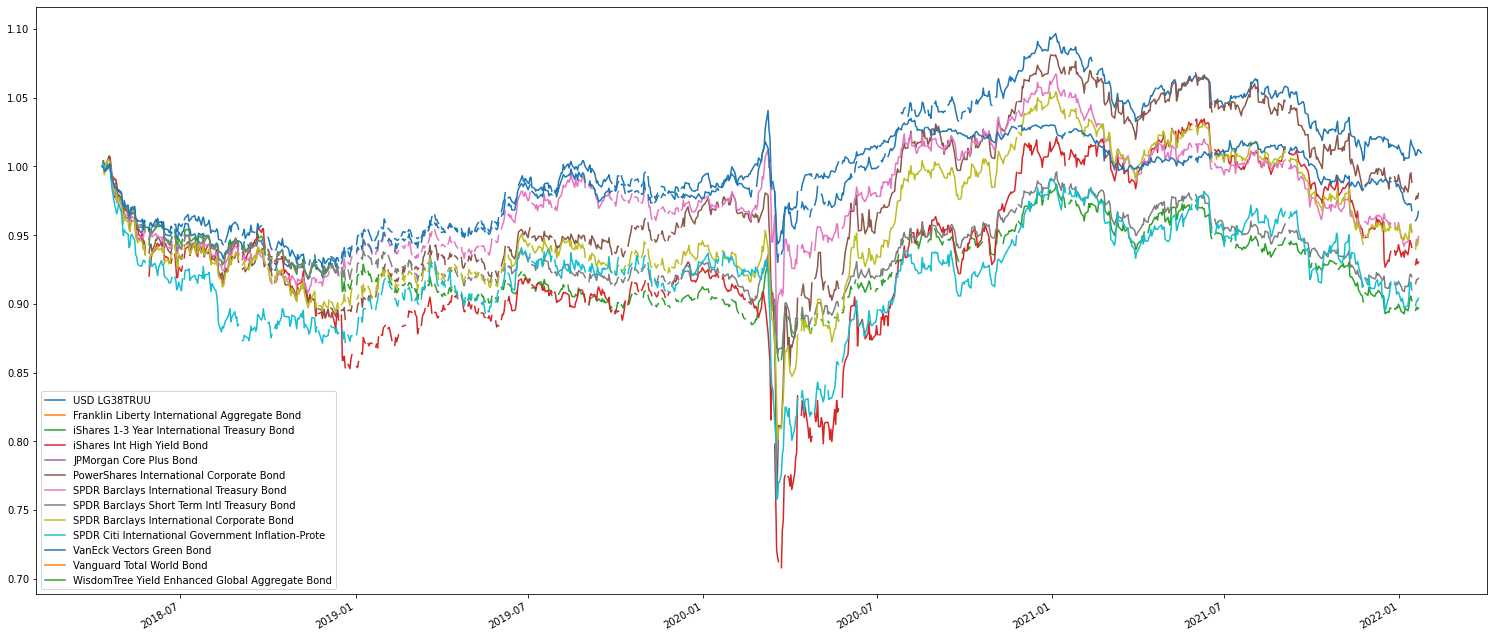

In [363]:
b = b.loc['20180410':]
c = b /b.iloc[0]
c.plot(figsize = (26,12))

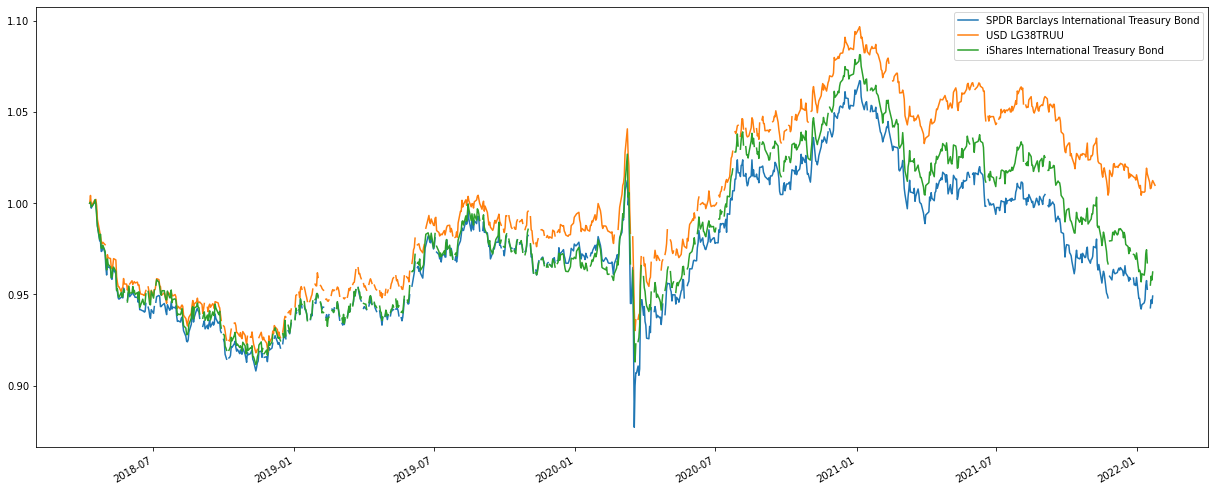

In [393]:
Teste  = tot_df[t].loc['20180410':]
t1 = Teste/Teste.loc['20180410']
t1.plot(figsize = (21,9))

## <font color = '009dcf'> Cáculo de Tracking Error
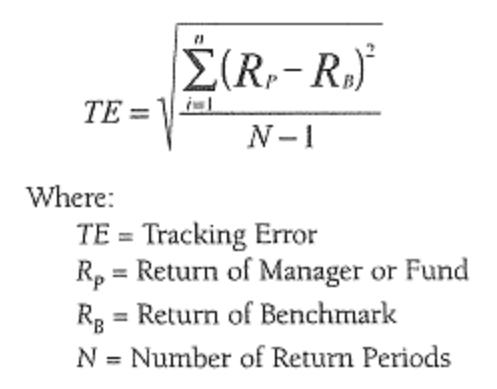

In [333]:
d = b.pct_change()
d = d[1:]
d.iloc[:,1:]



,Anfield Universal Fixed Income,iShares $ Treasury Bond 3-7Yr UCITS Acc,Deutsche X-trackers Barclays International Treasur,Deutsche X-trackers Barclays International Corpora,Direxion Daily 20+ Year Treasury Bull 3X Shares,Direxion Daily 7-10 Year Treasury Bull 3X Shares,Fidelity Total Bond,First Trust Low Duration Opportunities,FlexShares iBoxx 5-Year Target Duration TIPS,FlexShares Disciplined Duration MBS,...,Vanguard Short-Term Government Bond,Vanguard Long-Term Bond,Vanguard Long-Term Corporate Bond,Vanguard Intermediate-Term Government Bond,Vanguard Long-Term Government Bond,Vanguard Extended Duration,Vanguard Total World Bond,Vident Core U.S. Bond Strategy,WBI BullBear Trend Switch US Total Return,WisdomTree Barclays Yield Enhanced US Aggregate Bo
2018-04-11,NaN,NaN,0.000000,0.000201,0.009365,NaN,0.000812,0.000389,0.002837,0.002144,...,-0.000334,0.002099,0.001977,0.000000,0.003356,0.003956,NaN,0.001249,NaN,0.000812
2018-04-12,NaN,NaN,-0.000204,0.000000,-0.020619,-0.006585,-0.003246,-0.000389,-0.002425,-0.000856,...,-0.000334,-0.005071,-0.002083,-0.002389,-0.007358,-0.009458,NaN,-0.002495,NaN,-0.002232
2018-04-13,NaN,NaN,-0.001832,0.000000,0.006842,-0.004910,0.000814,-0.000389,0.000810,-0.001713,...,0.000167,0.001551,0.000439,0.000479,0.002291,0.002210,NaN,0.000000,NaN,0.001017
2018-04-16,NaN,NaN,0.001223,0.000000,-0.000523,0.000000,0.002034,-0.000389,-0.000405,-0.002574,...,-0.000501,-0.000332,-0.000769,-0.000160,0.000000,0.001323,NaN,0.000834,NaN,0.000000
2018-04-17,NaN,NaN,0.000000,0.002810,0.008368,-0.003701,0.000203,0.000779,0.000810,0.000000,...,0.000000,0.002434,0.001538,0.000160,0.002689,0.004757,NaN,-0.001250,NaN,0.000813
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-18,-0.001585,0.000000,0.000000,0.000000,-0.045161,-0.022321,-0.006898,-0.000803,-0.004001,-0.003047,...,-0.001486,-0.013908,-0.014184,-0.005491,-0.013383,-0.017655,-0.005802,-0.007011,0.0,-0.008284
2022-01-19,0.007407,-0.004738,0.000000,0.000000,0.024071,0.004981,0.001351,0.002009,-0.002191,-0.001310,...,0.000331,0.006132,0.002778,0.001840,0.006723,0.010936,0.001427,0.002219,0.0,0.000994
2022-01-20,-0.002101,0.000000,0.000000,0.000000,0.017320,0.007641,0.001541,-0.001003,0.001464,0.000437,...,-0.000331,0.000305,-0.000297,0.000612,0.005624,0.005976,0.001813,0.000201,0.0,0.001391
2022-01-21,0.001053,0.001550,0.000000,0.000000,0.037292,0.016807,0.003270,-0.000401,0.004386,0.001311,...,0.001157,0.012288,0.010591,0.003978,0.011185,0.016093,0.002844,0.005232,0.0,0.003373


In [334]:
for i in (range(len(d.columns))):
  print (i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85


In [335]:
TE = TE.dropna()
sum(TE)

15

In [336]:
import numpy as np

TE = pd.DataFrame()

for i  in range(len(d.columns)):
  TE[i] = ((np.subtract(d['USD LG38TRUU'],d.iloc[:,i]))**2)
  TE[i] = TE.iloc[:,i].dropna()
  # TE[i] = np.sqrt(sum(TE))
  
TE

,0,1,2,3,4,5,6,7,8,9,...,76,77,78,79,80,81,82,83,84,85
2018-04-11,0.0,NaN,NaN,1.796544e-05,1.630418e-05,0.000026,NaN,1.174010e-05,1.481777e-05,1.963113e-06,...,2.090430e-05,4.578804e-06,5.114971e-06,1.796544e-05,7.794439e-07,7.962224e-08,NaN,8.936194e-06,NaN,1.174010e-05
2018-04-12,0.0,NaN,NaN,2.478490e-05,2.685254e-05,0.000238,0.000002,3.747512e-06,2.297203e-05,7.599513e-06,...,2.350579e-05,1.240928e-08,9.605632e-06,7.798881e-06,4.734610e-06,1.828398e-05,NaN,7.217940e-06,NaN,8.703997e-06
2018-04-13,0.0,NaN,NaN,3.689185e-06,7.894407e-09,0.000046,0.000025,5.260833e-07,2.285139e-07,5.205944e-07,...,6.090040e-09,2.138100e-06,1.228621e-07,1.522195e-07,4.849926e-06,4.500284e-06,NaN,7.894407e-09,NaN,8.608555e-07
2018-04-16,0.0,NaN,NaN,1.032337e-06,5.015498e-06,0.000008,0.000005,4.234140e-08,6.910921e-06,6.992793e-06,...,7.508229e-06,6.612042e-06,9.048580e-06,5.755787e-06,5.015498e-06,8.396288e-07,NaN,1.975926e-06,NaN,5.015498e-06
2018-04-17,0.0,NaN,NaN,5.786277e-08,6.599790e-06,0.000066,0.000016,1.412523e-09,2.898972e-07,3.243277e-07,...,5.786277e-08,4.813151e-06,1.684144e-06,6.549648e-09,5.996179e-06,2.040097e-05,NaN,2.220954e-06,NaN,3.271450e-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-18,0.0,3.702296e-06,1.231253e-05,1.231253e-05,1.231253e-05,0.001735,0.000354,1.148499e-05,7.321731e-06,2.425896e-07,...,4.092679e-06,1.081510e-04,1.139510e-04,3.929243e-06,9.749716e-05,2.000994e-04,5.258026e-06,1.226608e-05,1.231253e-05,2.280160e-05
2022-01-19,0.0,4.955166e-05,2.606840e-05,1.355073e-07,1.355073e-07,0.000562,0.000021,9.652198e-07,2.693305e-06,6.551008e-06,...,1.400657e-09,3.322771e-05,5.809140e-06,2.167896e-06,4.038819e-05,1.116816e-04,1.120254e-06,3.426093e-06,1.355073e-07,3.922742e-07
2022-01-20,0.0,2.364196e-05,7.625658e-06,7.625658e-06,7.625658e-06,0.000212,0.000024,1.488482e-06,1.416819e-05,1.683066e-06,...,9.560698e-06,6.035400e-06,9.353277e-06,4.618586e-06,8.193576e-06,1.033486e-05,8.995717e-07,6.554476e-06,7.625658e-06,1.878651e-06
2022-01-21,0.0,4.412110e-08,8.233096e-08,1.594365e-06,1.594365e-06,0.001298,0.000242,4.031288e-06,2.769319e-06,9.754897e-06,...,1.108270e-08,1.215578e-04,8.701591e-05,7.372780e-06,9.845042e-05,2.199278e-04,2.500083e-06,1.575899e-05,1.594365e-06,4.453510e-06
